# Train vs Test

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generar data

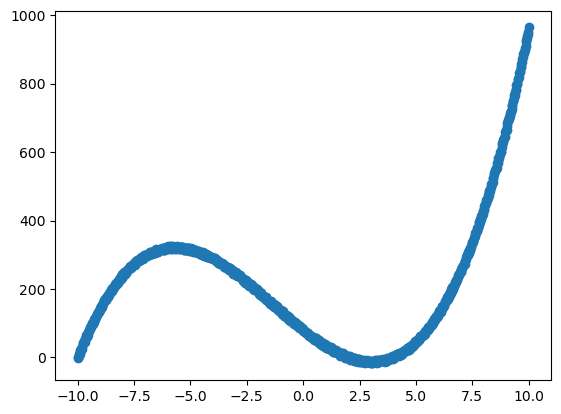

In [44]:
NOISE = 10

data_init = -10
data_end = 10
size_data = 1000

A, B, C = 2, 4, -10

X = np.linspace(data_init,data_end,size_data)
Y = [(x-A)*(x-B)*(x-C)+(random.random()-0.5)*NOISE for x in X]

plt.scatter( X, Y )

## Metodos

In [47]:
# modelo : lista de parametros de la funcion, 
#          ejemplo: [2,5] = x*2+4
#          ejemplo: [3,2,5] = 3*(x**2)+2*(x)+4
def calcular_modelo(modelo, x):
    result = 0
    for i in range(len(modelo)):
        result += modelo[-1*(i+1)]*(x**i)
    return result

In [49]:
def calcular_error(modelo,data_x,data_y):
    error_total = 0
    for i in range(len(data_x)):
        predicted_y = calcular_modelo(modelo,data_x[i])
        real_y = data_y[i]
        error_total += (predicted_y-real_y)**2
    return error_total/len(data_x)

## Nodo

In [52]:
class Node:
    def __init__(self,modelo, data):
        self.modelo = modelo
        self.error = calcular_error(modelo,[d[0] for d in data],[d[1] for d in data])
    def __lt__(self,other):
        return self.error < other.error
    def __str__(self):
        return f"[model:{self.modelo} , error:{self.error:.2f}]"
    def __repr__(self):
        return self.__str__()

## Separacion datos - Training vs Testing

In [55]:
from sklearn.model_selection import train_test_split

DATA = [ [X[i],Y[i]] for i in range(len(X)) ]

data_train, data_test = train_test_split(DATA, test_size=0.2, random_state=42)

print("Training data: ",len(data_train))
print("Testing data: ",len(data_test))

Training data:  800
Testing data:  200


## Solucion por grafos

In [58]:
def regresion_linear_grafos(modelo, deltas, max_iteraciones, data):

    solution_node = Node(modelo, data)
    
    for iteration in range(max_iteraciones):
    
        next_nodes = []
        
        # generar cambios en los nodos segun los deltas
        for i in range(len(solution_node.modelo)):
            copy_model_pluss = solution_node.modelo[:]
            copy_model_pluss[i] = copy_model_pluss[i] + deltas[i]
            #print(solution_node.modelo," -> ",copy_model_pluss)
            next_nodes.append( Node(copy_model_pluss, data) )
            copy_model_minus = solution_node.modelo[:]
            copy_model_minus[i] = copy_model_minus[i] - deltas[i]
            #print(solution_node.modelo," -> ",copy_model_minus)
            next_nodes.append( Node(copy_model_minus, data) )
    
        next_nodes.sort()
    
        if next_nodes[0].error < solution_node.error:
            solution_node = next_nodes[0]
        else:
            print(f"Solution found! in {iteration} iterations")
            break;

    return solution_node

# Find solution - for training data

Solution found! in 15415 iterations


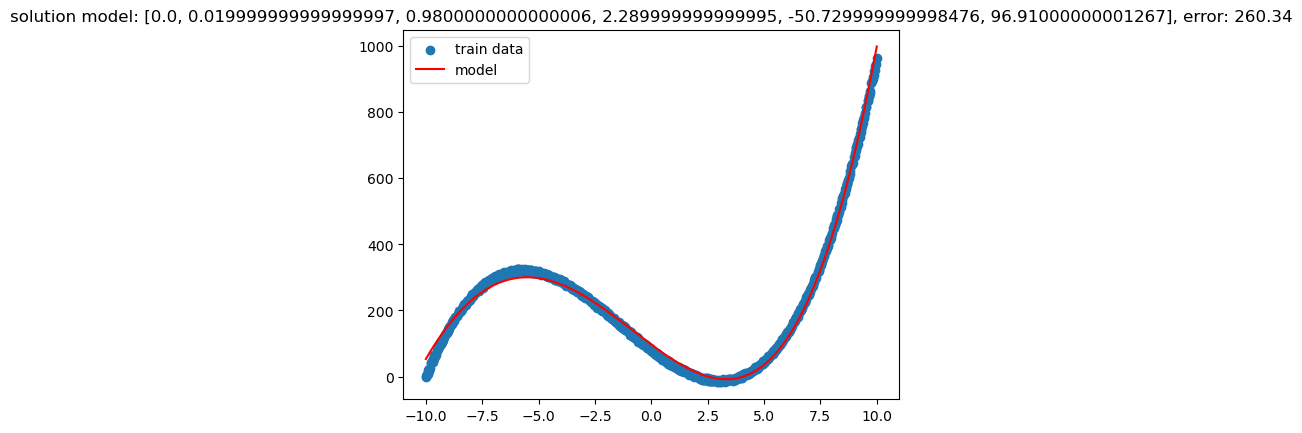

In [89]:
POLYNOM = 6
DELTAS = 0.01

deltas = list( np.ones( POLYNOM )*DELTAS )
modelo = list( np.zeros( POLYNOM ) )
    
nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000, data=data_train)

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( [d[0] for d in data_train],[d[1] for d in data_train],label="train data")
plt.plot( X, [ calcular_modelo(nodo_solucion.modelo, x) for x in X ], label="model", color="red" )
plt.legend()
plt.show()

# Find predictions - test data

Solution found! in 15425 iterations


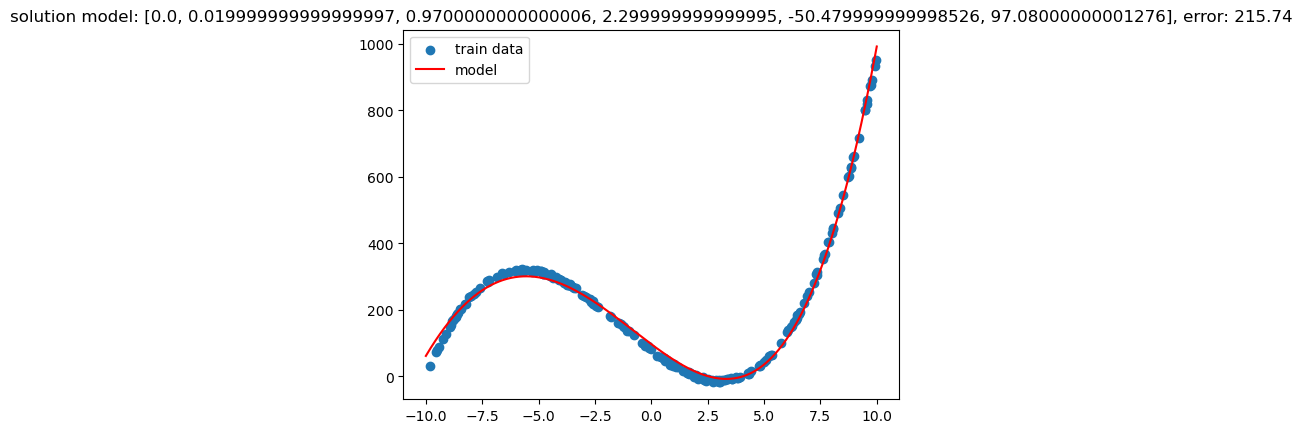

In [91]:
deltas = list( np.ones( POLYNOM )*DELTAS )
modelo = list( np.zeros( POLYNOM ) )
    
nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000, data=data_test)

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( [d[0] for d in data_test],[d[1] for d in data_test],label="train data")
plt.plot( X, [ calcular_modelo(nodo_solucion.modelo, x) for x in X ], label="model", color="red" )
plt.legend()
plt.show()